# Complete Systematic Trading Workflow

## End-to-End Trading System Demonstration

This notebook demonstrates the complete workflow of a systematic trading system including:

1. **Strategy Development** - Multiple trading strategies
2. **Data Management** - Downloading and processing market data
3. **Backtesting** - Testing strategies on historical data
4. **Risk Management** - Portfolio optimization and drawdown controls
5. **Execution** - Mock trading with realistic costs
6. **Performance Monitoring** - Tracking and analyzing results
7. **Compliance** - Risk limits and reporting
8. **Continuous Improvement** - Strategy optimization

Based on Robert Carver's **Systematic Trading** principles.

## Setup and Imports

In [1]:
import sys
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Add project root to path
project_root = Path.cwd().parent
sys.path.insert(0, str(project_root))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure plotting
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("✓ Imports successful")

✓ Imports successful


## 1. Data Management

Download historical data for US technology stocks.

In [2]:
from data.data_manager import DataManager
from config.settings import Settings

# Initialize data manager
data_manager = DataManager()

# Define our universe of stocks
tickers = ['AAPL', 'MSFT', 'GOOGL', 'TSLA', 'NVDA', 'META']

print(f"Downloading data for {len(tickers)} stocks...")
stock_data = data_manager.download_multiple_stocks(
    tickers=tickers,
    start_date='2020-01-01',
    end_date='2024-12-31',
    save=True
)

print(f"\n✓ Downloaded data for {len(stock_data)} stocks")
for ticker, df in stock_data.items():
    print(f"  {ticker}: {len(df)} rows from {df.index[0].date()} to {df.index[-1].date()}")

2025-11-01 22:16:58 - data.data_manager - INFO - Downloading AAPL from 2020-01-01 to 2024-12-31
2025-11-01 22:16:59 - data.data_manager - INFO - Downloaded 1257 rows for AAPL
2025-11-01 22:16:59 - data.data_manager - INFO - Saved AAPL data to /home/varuvenk/systematic_trading/data/historical/AAPL.csv
2025-11-01 22:16:59 - data.data_manager - INFO - Downloading MSFT from 2020-01-01 to 2024-12-31
2025-11-01 22:16:59 - data.data_manager - INFO - Downloaded 1257 rows for MSFT
2025-11-01 22:16:59 - data.data_manager - INFO - Saved MSFT data to /home/varuvenk/systematic_trading/data/historical/MSFT.csv
2025-11-01 22:16:59 - data.data_manager - INFO - Downloading GOOGL from 2020-01-01 to 2024-12-31
2025-11-01 22:16:59 - data.data_manager - INFO - Downloaded 1257 rows for GOOGL
2025-11-01 22:16:59 - data.data_manager - INFO - Saved GOOGL data to /home/varuvenk/systematic_trading/data/historical/GOOGL.csv
2025-11-01 22:16:59 - data.data_manager - INFO - Downloading TSLA from 2020-01-01 to 2024-

## 2. Strategy Development

Define multiple trading strategies across different styles:
- Trend Following (EWMAC)
- Mean Reversion (Bollinger Bands)
- Momentum (MACD)
- Breakout (Donchian)

In [3]:
from strategy import (
    EWMAC, MultipleEWMAC,
    BollingerBands, RSIMeanReversion,
    MACD, DualMomentum,
    DonchianBreakout, VolatilityBreakout
)

# Define strategies to test
strategies = {
    'EWMAC_16_64': EWMAC(fast_span=16, slow_span=64, name='EWMAC_16_64'),
    'EWMAC_32_128': EWMAC(fast_span=32, slow_span=128, name='EWMAC_32_128'),
    'Bollinger_Bands': BollingerBands(period=20, num_std=2.0),
    'RSI_Mean_Reversion': RSIMeanReversion(period=14),
    'MACD': MACD(fast_period=12, slow_period=26, signal_period=9),
    'Dual_Momentum': DualMomentum(periods=[20, 60, 120]),
    'Donchian_Breakout': DonchianBreakout(entry_period=20, exit_period=10),
    'Volatility_Breakout': VolatilityBreakout(lookback=20, threshold=1.5),
}

print(f"✓ Defined {len(strategies)} trading strategies:")
for name in strategies.keys():
    print(f"  - {name}")

2025-11-01 22:17:00 - strategy.base_strategy - INFO - Initialized strategy: EWMAC_16_64
2025-11-01 22:17:00 - strategy.trend_following - INFO - EWMAC initialized: fast=16, slow=64
2025-11-01 22:17:00 - strategy.base_strategy - INFO - Initialized strategy: EWMAC_32_128
2025-11-01 22:17:00 - strategy.trend_following - INFO - EWMAC initialized: fast=32, slow=128
2025-11-01 22:17:00 - strategy.base_strategy - INFO - Initialized strategy: Bollinger_Bands
2025-11-01 22:17:00 - strategy.mean_reversion - INFO - Bollinger Bands: period=20, std=2.0
2025-11-01 22:17:00 - strategy.base_strategy - INFO - Initialized strategy: RSI_Mean_Reversion
2025-11-01 22:17:00 - strategy.mean_reversion - INFO - RSI Mean Reversion: period=14, OB=70.0, OS=30.0
2025-11-01 22:17:00 - strategy.base_strategy - INFO - Initialized strategy: MACD
2025-11-01 22:17:00 - strategy.momentum - INFO - MACD: fast=12, slow=26, signal=9
2025-11-01 22:17:00 - strategy.base_strategy - INFO - Initialized strategy: Dual_Momentum
2025

### Visualize Strategy Signals

Let's visualize signals from different strategies on AAPL

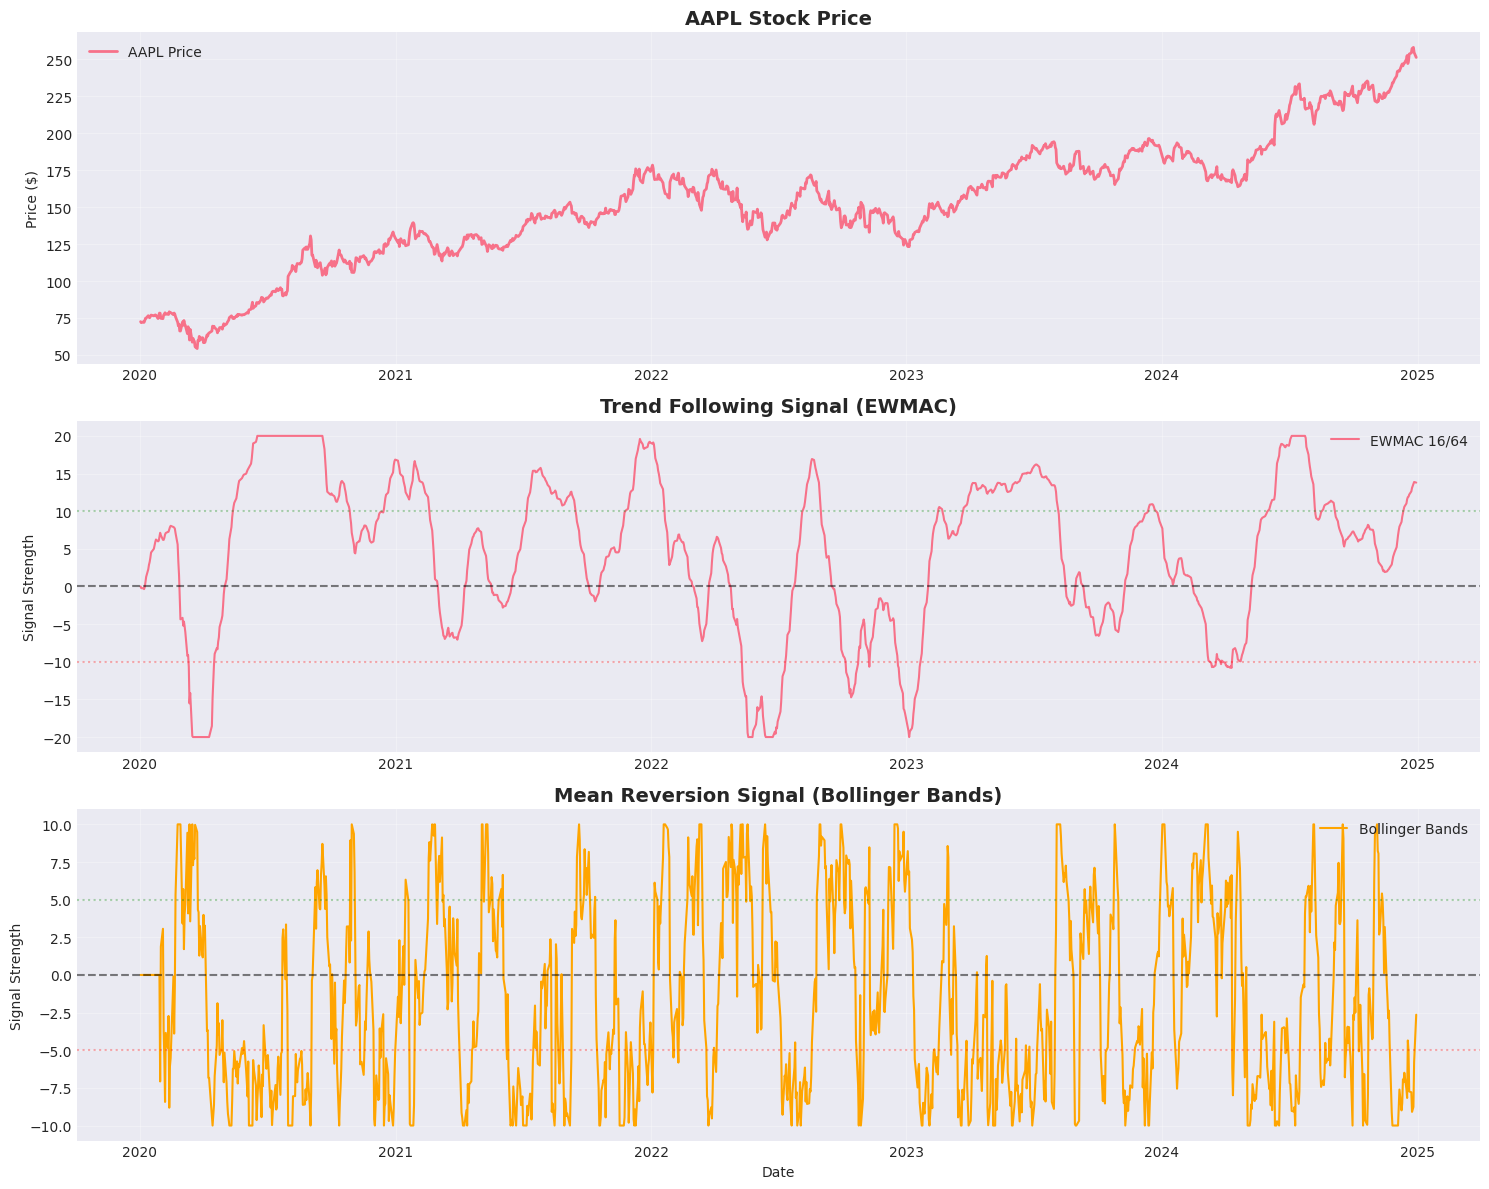

✓ Signals generated and visualized


In [4]:
# Generate signals for AAPL
aapl_data = stock_data['AAPL']

fig, axes = plt.subplots(3, 1, figsize=(15, 12))

# Plot price
axes[0].plot(aapl_data.index, aapl_data['Close'], label='AAPL Price', linewidth=2)
axes[0].set_title('AAPL Stock Price', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Price ($)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot trend following signals
ewmac_signal = strategies['EWMAC_16_64'].generate_signals(aapl_data)
axes[1].plot(ewmac_signal.index, ewmac_signal, label='EWMAC 16/64', linewidth=1.5)
axes[1].axhline(y=0, color='black', linestyle='--', alpha=0.5)
axes[1].axhline(y=10, color='green', linestyle=':', alpha=0.3)
axes[1].axhline(y=-10, color='red', linestyle=':', alpha=0.3)
axes[1].set_title('Trend Following Signal (EWMAC)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Signal Strength')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Plot mean reversion signals
bb_signal = strategies['Bollinger_Bands'].generate_signals(aapl_data)
axes[2].plot(bb_signal.index, bb_signal, label='Bollinger Bands', linewidth=1.5, color='orange')
axes[2].axhline(y=0, color='black', linestyle='--', alpha=0.5)
axes[2].axhline(y=5, color='green', linestyle=':', alpha=0.3)
axes[2].axhline(y=-5, color='red', linestyle=':', alpha=0.3)
axes[2].set_title('Mean Reversion Signal (Bollinger Bands)', fontsize=14, fontweight='bold')
axes[2].set_ylabel('Signal Strength')
axes[2].set_xlabel('Date')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ Signals generated and visualized")

## 3. Backtesting Engine

Test each strategy on historical data with realistic costs.

In [5]:
from backtesting.backtest_engine import BacktestEngine
from risk_management.position_sizer import PositionSizer

# Initialize backtesting components
backtest_engine = BacktestEngine(
    initial_capital=100000,
    transaction_cost=0.001,  # 0.1%
    slippage=0.0005  # 0.05%
)

position_sizer = PositionSizer(
    capital=100000,
    volatility_target=0.20  # 20% annual volatility target
)

print("✓ Backtest engine initialized")
print(f"  Initial Capital: ${backtest_engine.initial_capital:,.0f}")
print(f"  Transaction Cost: {backtest_engine.transaction_cost:.3%}")
print(f"  Slippage: {backtest_engine.slippage:.3%}")

2025-11-01 22:17:01 - backtesting.backtest_engine - INFO - BacktestEngine initialized: capital=100000, costs=0.0010, slippage=0.0005
2025-11-01 22:17:01 - risk_management.position_sizer - INFO - PositionSizer initialized: capital=100000, vol_target=0.2, max_size=0.1
✓ Backtest engine initialized
  Initial Capital: $100,000
  Transaction Cost: 0.100%
  Slippage: 0.050%


### Run Backtests for All Strategies

In [6]:
# Test each strategy on AAPL
backtest_results = {}

print("Running backtests...\n")
for strategy_name, strategy in strategies.items():
    print(f"Testing {strategy_name}...", end=" ")
    result = backtest_engine.run(
        strategy=strategy,
        data=aapl_data,
        position_sizer=position_sizer
    )
    backtest_results[strategy_name] = result
    print(f"✓ Sharpe: {result['sharpe_ratio']:.2f}, Return: {result['annualized_return']:.2%}")

print("\n✓ All backtests completed")

Running backtests...

Testing EWMAC_16_64... 2025-11-01 22:17:01 - backtesting.backtest_engine - INFO - Starting backtest for EWMAC_16_64
2025-11-01 22:17:01 - backtesting.backtest_engine - INFO - Backtest completed for EWMAC_16_64
✓ Sharpe: -0.68, Return: 0.78%
Testing EWMAC_32_128... 2025-11-01 22:17:01 - backtesting.backtest_engine - INFO - Starting backtest for EWMAC_32_128
2025-11-01 22:17:01 - backtesting.backtest_engine - INFO - Backtest completed for EWMAC_32_128
✓ Sharpe: -0.83, Return: 0.34%
Testing Bollinger_Bands... 2025-11-01 22:17:01 - backtesting.backtest_engine - INFO - Starting backtest for Bollinger_Bands
2025-11-01 22:17:01 - backtesting.backtest_engine - INFO - Backtest completed for Bollinger_Bands
✓ Sharpe: -2.11, Return: -3.54%
Testing RSI_Mean_Reversion... 2025-11-01 22:17:01 - backtesting.backtest_engine - INFO - Starting backtest for RSI_Mean_Reversion
2025-11-01 22:17:01 - backtesting.backtest_engine - INFO - Backtest completed for RSI_Mean_Reversion
✓ Sharpe

### Compare Strategy Performance

In [7]:
# Create comparison dataframe
comparison_data = []
for strategy_name, result in backtest_results.items():
    comparison_data.append({
        'Strategy': strategy_name,
        'Total Return': result['total_return'],
        'Annual Return': result['annualized_return'],
        'Annual Vol': result['annualized_volatility'],
        'Sharpe Ratio': result['sharpe_ratio'],
        'Total Trades': result['total_trades'],
        'Total Costs': result['total_costs'],
    })

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.sort_values('Sharpe Ratio', ascending=False)

print("\n📊 Strategy Performance Comparison (AAPL)\n")
print("=" * 100)
print(comparison_df.to_string(index=False))
print("=" * 100)


📊 Strategy Performance Comparison (AAPL)

           Strategy  Total Return  Annual Return  Annual Vol  Sharpe Ratio  Total Trades  Total Costs
Volatility_Breakout      0.110695       0.021612    0.031958     -0.253158          1229  3336.205617
        EWMAC_16_64      0.038964       0.007815    0.031717     -0.684379          1229   867.567855
               MACD      0.044835       0.008972    0.029918     -0.688991          1206  2897.229721
       EWMAC_32_128      0.016798       0.003398    0.031584     -0.826576          1229   569.147320
      Dual_Momentum     -0.031116      -0.006417    0.027128     -1.329793          1135  2377.211142
  Donchian_Breakout      0.006133       0.001246    0.019419     -1.470981           499  6171.968018
    Bollinger_Bands     -0.162283      -0.035420    0.031051     -2.112898          1229  3330.480325
 RSI_Mean_Reversion     -0.028159      -0.005800    0.015485     -2.305622           455  2844.317223


### Visualize Equity Curves

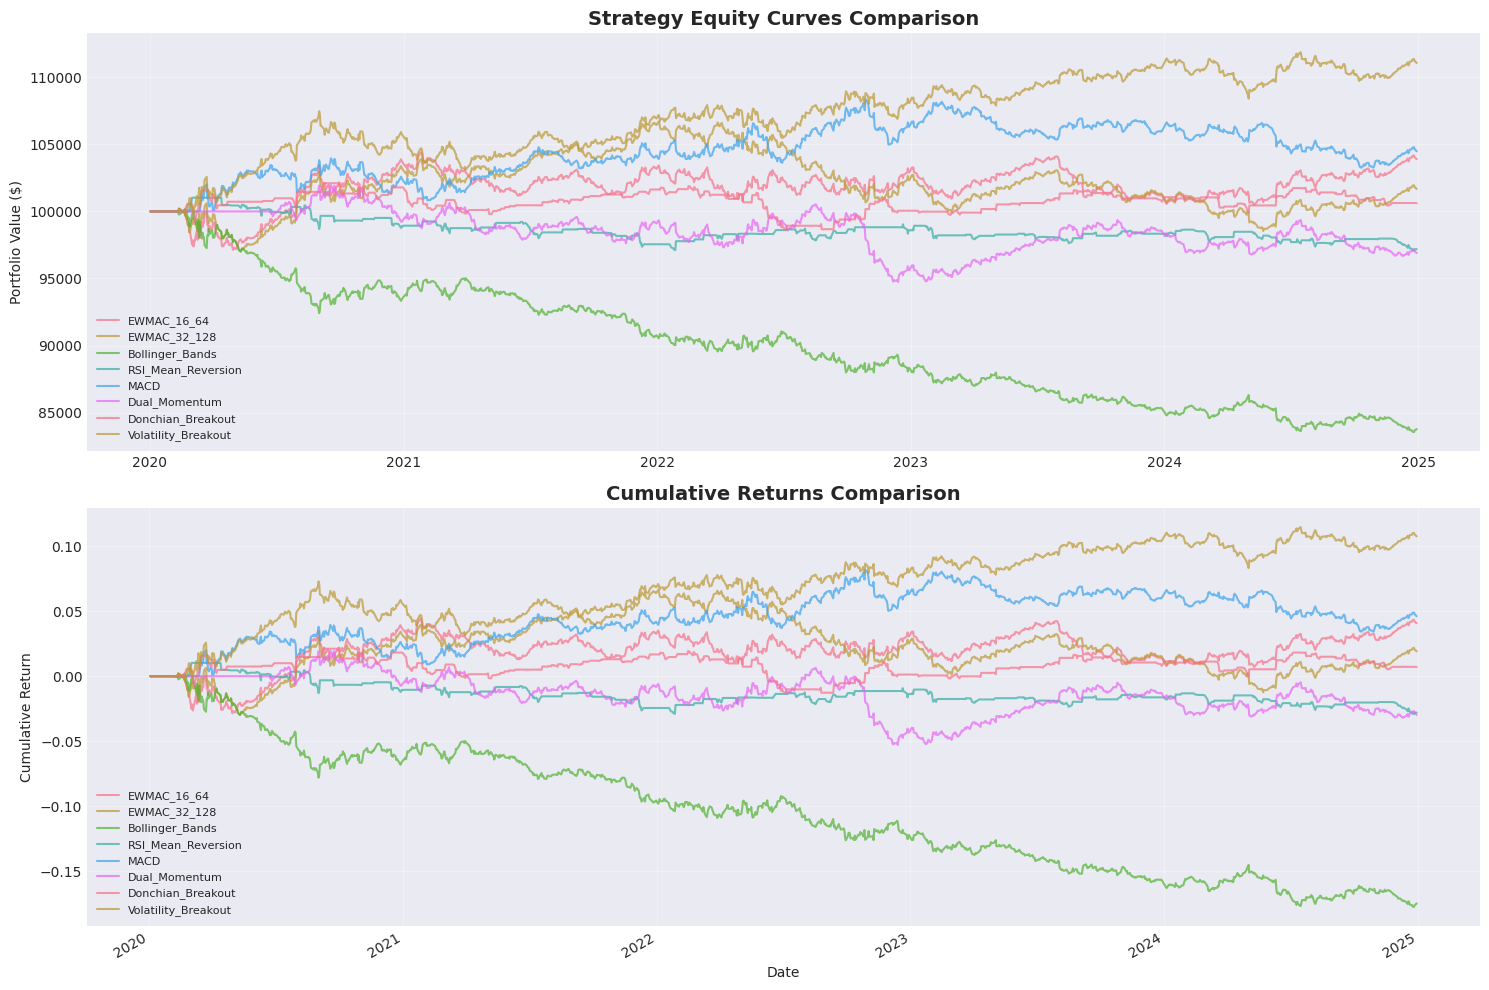

In [8]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Plot equity curves
for strategy_name, result in backtest_results.items():
    equity = result['equity_curve']
    axes[0].plot(equity.index, equity, label=strategy_name, alpha=0.7, linewidth=1.5)

axes[0].set_title('Strategy Equity Curves Comparison', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Portfolio Value ($)')
axes[0].legend(loc='best', fontsize=8)
axes[0].grid(True, alpha=0.3)

# Plot returns comparison
returns_data = {}
for strategy_name, result in backtest_results.items():
    returns_data[strategy_name] = result['returns']

returns_df = pd.DataFrame(returns_data)
returns_df.cumsum().plot(ax=axes[1], alpha=0.7, linewidth=1.5)
axes[1].set_title('Cumulative Returns Comparison', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Cumulative Return')
axes[1].set_xlabel('Date')
axes[1].legend(loc='best', fontsize=8)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 4. Risk Management & Portfolio Optimization

Apply portfolio optimization to combine multiple strategies across multiple stocks.

In [9]:
from risk_management.portfolio_optimizer import PortfolioOptimizer
from risk_management.drawdown_manager import DrawdownManager

# Select top 3 strategies based on Sharpe ratio
top_strategies = comparison_df.head(3)['Strategy'].tolist()
selected_strategies = {name: strategies[name] for name in top_strategies}

print(f"\n🎯 Selected Top 3 Strategies:")
for name in top_strategies:
    sharpe = comparison_df[comparison_df['Strategy'] == name]['Sharpe Ratio'].values[0]
    print(f"  - {name} (Sharpe: {sharpe:.2f})")


🎯 Selected Top 3 Strategies:
  - Volatility_Breakout (Sharpe: -0.25)
  - EWMAC_16_64 (Sharpe: -0.68)
  - MACD (Sharpe: -0.69)


### Portfolio Optimization Methods

In [10]:
# Calculate returns for each strategy
strategy_returns = pd.DataFrame({
    name: backtest_results[name]['returns'] 
    for name in top_strategies
})

# Initialize portfolio optimizer
optimizer = PortfolioOptimizer(risk_free_rate=0.03)

# Test different optimization methods
optimization_methods = ['equal', 'risk_parity', 'min_variance', 'max_sharpe', 'inverse_vol']
optimization_results = {}

print("\n📈 Portfolio Optimization Results:\n")
for method in optimization_methods:
    result = optimizer.optimize_portfolio(strategy_returns, method=method)
    optimization_results[method] = result
    
    print(f"{method.upper().replace('_', ' ')}:")
    print(f"  Expected Return: {result['expected_return']:.2%}")
    print(f"  Volatility: {result['volatility']:.2%}")
    print(f"  Sharpe Ratio: {result['sharpe_ratio']:.2f}")
    print(f"  Weights: {result['weights']}")
    print()

2025-11-01 22:17:02 - risk_management.portfolio_optimizer - INFO - PortfolioOptimizer initialized: rf_rate=0.03

📈 Portfolio Optimization Results:

2025-11-01 22:17:02 - risk_management.portfolio_optimizer - INFO - Optimizing portfolio using equal method
2025-11-01 22:17:02 - risk_management.portfolio_optimizer - INFO - Portfolio optimized: Sharpe=-0.73, Vol=2.34%
EQUAL:
  Expected Return: 1.30%
  Volatility: 2.34%
  Sharpe Ratio: -0.73
  Weights: {'Volatility_Breakout': 0.3333333333333333, 'EWMAC_16_64': 0.3333333333333333, 'MACD': 0.3333333333333333}

2025-11-01 22:17:02 - risk_management.portfolio_optimizer - INFO - Optimizing portfolio using risk_parity method
2025-11-01 22:17:02 - risk_management.portfolio_optimizer - INFO - Portfolio optimized: Sharpe=-0.77, Vol=2.30%
RISK PARITY:
  Expected Return: 1.23%
  Volatility: 2.30%
  Sharpe Ratio: -0.77
  Weights: {'Volatility_Breakout': 0.2793944893827343, 'EWMAC_16_64': 0.3585189883855284, 'MACD': 0.36208652223173726}

2025-11-01 22:1

### Drawdown Analysis

2025-11-01 22:17:02 - risk_management.drawdown_manager - INFO - DrawdownManager initialized: warn=15.0%, stop=25.0%, scale=10.0%

📉 Drawdown Analysis for Volatility_Breakout:

  Max Drawdown: -4.07%
  Current Drawdown: -0.71%
  Calmar Ratio: 0.52
  Ulcer Index: 0.0145
  Risk Status: NORMAL
  Recommended Action: NONE


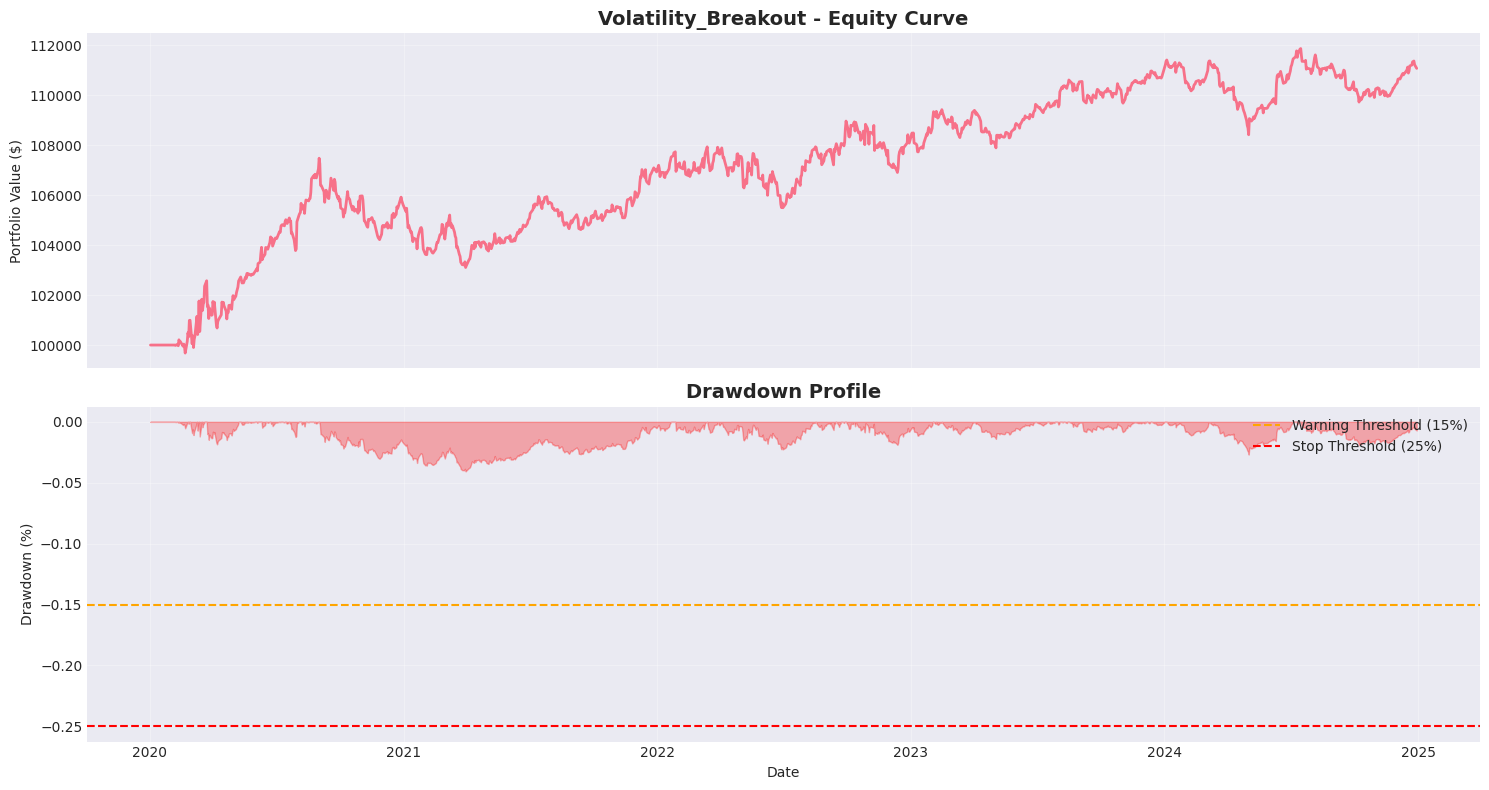

In [11]:
# Initialize drawdown manager
dd_manager = DrawdownManager(
    max_drawdown_threshold=0.15,
    stop_trading_threshold=0.25,
    scale_down_threshold=0.10
)

# Analyze drawdowns for top strategy
best_strategy = top_strategies[0]
equity_curve = backtest_results[best_strategy]['equity_curve']

dd_summary = dd_manager.get_drawdown_summary(equity_curve)

print(f"\n📉 Drawdown Analysis for {best_strategy}:\n")
print(f"  Max Drawdown: {dd_summary['max_drawdown']:.2%}")
print(f"  Current Drawdown: {dd_summary['current_drawdown']:.2%}")
print(f"  Calmar Ratio: {dd_summary['calmar_ratio']:.2f}")
print(f"  Ulcer Index: {dd_summary['ulcer_index']:.4f}")
print(f"  Risk Status: {dd_summary['status'].upper()}")
print(f"  Recommended Action: {dd_summary['action'].replace('_', ' ').upper()}")

# Visualize drawdown
drawdown_series = dd_manager.calculate_drawdown(equity_curve)

fig, axes = plt.subplots(2, 1, figsize=(15, 8), sharex=True)

axes[0].plot(equity_curve.index, equity_curve, linewidth=2)
axes[0].set_title(f'{best_strategy} - Equity Curve', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Portfolio Value ($)')
axes[0].grid(True, alpha=0.3)

axes[1].fill_between(drawdown_series.index, drawdown_series, 0, color='red', alpha=0.3)
axes[1].axhline(y=-dd_manager.max_drawdown_threshold, color='orange', linestyle='--', 
                label=f'Warning Threshold ({dd_manager.max_drawdown_threshold:.0%})')
axes[1].axhline(y=-dd_manager.stop_trading_threshold, color='red', linestyle='--',
                label=f'Stop Threshold ({dd_manager.stop_trading_threshold:.0%})')
axes[1].set_title('Drawdown Profile', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Drawdown (%)')
axes[1].set_xlabel('Date')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 5. Mock Execution with Realistic Trading Fees

Simulate realistic trade execution with commissions, slippage, and market impact.

In [12]:
from execution.mock_broker import MockBroker
from execution.execution_engine import ExecutionEngine
from execution.order import OrderType

# Initialize mock broker
broker = MockBroker(
    initial_capital=100000,
    commission_rate=0.001,
    slippage_rate=0.0005,
    min_commission=1.0,
    market_impact_factor=0.001
)

# Initialize execution engine
execution_engine = ExecutionEngine(
    broker=broker,
    position_sizer=position_sizer,
    rebalance_threshold=0.05
)

print("✓ Execution engine initialized")
print(f"  Initial Capital: ${broker.initial_capital:,.0f}")
print(f"  Commission Rate: {broker.commission_rate:.3%}")
print(f"  Slippage Rate: {broker.slippage_rate:.3%}")

2025-11-01 22:17:03 - execution.mock_broker - INFO - MockBroker initialized: capital=$100,000, commission=0.0010, slippage=0.0005
2025-11-01 22:17:03 - execution.execution_engine - INFO - ExecutionEngine initialized with rebalance_threshold=0.05
✓ Execution engine initialized
  Initial Capital: $100,000
  Commission Rate: 0.100%
  Slippage Rate: 0.050%


### Run Backtest with Execution Engine

In [13]:
# Use best strategy for execution simulation
best_strategy_obj = strategies[best_strategy]

# Run backtest with execution engine (more realistic)
print(f"Running execution simulation with {best_strategy}...\n")

execution_results = execution_engine.run_backtest(
    strategy=best_strategy_obj,
    data_dict={'AAPL': aapl_data},
    start_index=0
)

print("\n✓ Execution simulation completed\n")
print("📊 Results:")
print(f"  Total Return: {execution_results['total_return']:.2%}")
print(f"  Annual Return: {execution_results['annualized_return']:.2%}")
print(f"  Annual Volatility: {execution_results['annualized_volatility']:.2%}")
print(f"  Sharpe Ratio: {execution_results['sharpe_ratio']:.2f}")
print(f"  Final Value: ${execution_results['final_value']:,.2f}")

# Trading statistics
trade_stats = execution_results['trade_statistics']
print("\n💰 Trading Costs:")
print(f"  Total Trades: {trade_stats['total_trades']}")
print(f"  Total Commission: ${trade_stats['total_commission']:,.2f}")
print(f"  Total Slippage: ${trade_stats['total_slippage']:,.2f}")
print(f"  Total Costs: ${trade_stats['total_costs']:,.2f}")
print(f"  Cost as % of Returns: {trade_stats['cost_as_percentage']:.2%}")

Running execution simulation with Volatility_Breakout...

2025-11-01 22:17:03 - execution.execution_engine - INFO - Starting backtest with ExecutionEngine
2025-11-01 22:17:03 - execution.mock_broker - INFO - Broker reset to initial state
2025-11-01 22:17:03 - execution.execution_engine - INFO - Executing signals for 1 symbols
2025-11-01 22:17:03 - execution.execution_engine - INFO - Generated 0 orders
2025-11-01 22:17:03 - execution.execution_engine - INFO - Executed 0 out of 0 orders
2025-11-01 22:17:03 - execution.execution_engine - INFO - Executing signals for 1 symbols
2025-11-01 22:17:03 - execution.execution_engine - INFO - Generated 0 orders
2025-11-01 22:17:03 - execution.execution_engine - INFO - Executed 0 out of 0 orders
2025-11-01 22:17:03 - execution.execution_engine - INFO - Executing signals for 1 symbols
2025-11-01 22:17:03 - execution.execution_engine - INFO - Generated 0 orders
2025-11-01 22:17:03 - execution.execution_engine - INFO - Executed 0 out of 0 orders
2025-1

## 6. Performance Monitoring

Comprehensive performance analysis and visualization.

In [14]:
from backtesting.performance import PerformanceAnalyzer

# Analyze performance
analyzer = PerformanceAnalyzer(execution_results)

print("\n📈 Detailed Performance Analysis\n")
print("=" * 80)
analyzer.print_summary()
print("=" * 80)

2025-11-01 22:17:08 - backtesting.performance - INFO - PerformanceAnalyzer initialized

📈 Detailed Performance Analysis


BACKTEST PERFORMANCE SUMMARY

Period: 2020-01-02 to 2024-12-30
Initial Capital: $100,000.00
Final Equity: $107,092.14

Total Return: 7.09%
Annualized Return: 1.38%
Annualized Volatility: 2.90%
Sharpe Ratio: 0.48

Total Trades: 339
Total Costs: $3,775.14

Maximum Drawdown: -4.05%
Peak Date: 2020-09-01 00:00:00-04:00
Trough Date: 2021-03-31 00:00:00-04:00



### Performance Visualizations

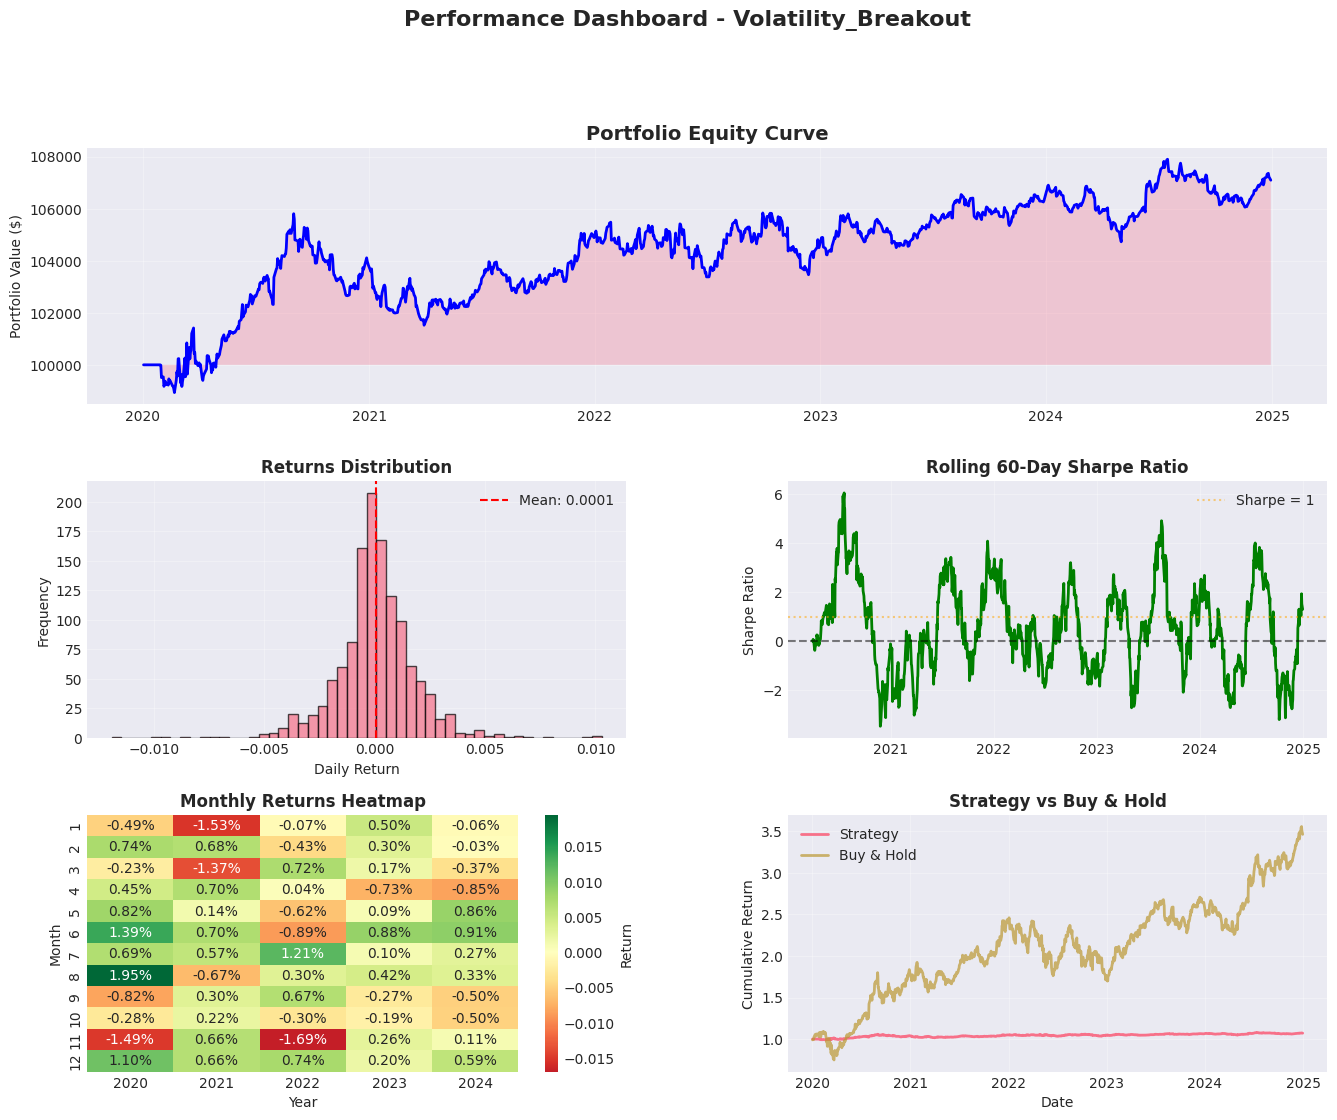

In [15]:
# Create comprehensive performance dashboard
fig = plt.figure(figsize=(16, 12))
gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)

# 1. Equity Curve
ax1 = fig.add_subplot(gs[0, :])
equity = execution_results['equity_curve']
ax1.plot(equity.index, equity, linewidth=2, color='blue')
ax1.fill_between(equity.index, broker.initial_capital, equity, alpha=0.3)
ax1.set_title('Portfolio Equity Curve', fontsize=14, fontweight='bold')
ax1.set_ylabel('Portfolio Value ($)')
ax1.grid(True, alpha=0.3)

# 2. Returns Distribution
ax2 = fig.add_subplot(gs[1, 0])
returns = execution_results['returns'].dropna()
ax2.hist(returns, bins=50, edgecolor='black', alpha=0.7)
ax2.axvline(returns.mean(), color='red', linestyle='--', label=f'Mean: {returns.mean():.4f}')
ax2.set_title('Returns Distribution', fontsize=12, fontweight='bold')
ax2.set_xlabel('Daily Return')
ax2.set_ylabel('Frequency')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Rolling Sharpe Ratio
ax3 = fig.add_subplot(gs[1, 1])
rolling_sharpe = (returns.rolling(60).mean() / returns.rolling(60).std()) * np.sqrt(252)
ax3.plot(rolling_sharpe.index, rolling_sharpe, linewidth=2, color='green')
ax3.axhline(y=0, color='black', linestyle='--', alpha=0.5)
ax3.axhline(y=1, color='orange', linestyle=':', alpha=0.5, label='Sharpe = 1')
ax3.set_title('Rolling 60-Day Sharpe Ratio', fontsize=12, fontweight='bold')
ax3.set_ylabel('Sharpe Ratio')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Monthly Returns Heatmap
ax4 = fig.add_subplot(gs[2, 0])
monthly_returns = returns.resample('M').sum()
monthly_pivot = monthly_returns.to_frame('returns')
monthly_pivot['year'] = monthly_pivot.index.year
monthly_pivot['month'] = monthly_pivot.index.month
monthly_table = monthly_pivot.pivot_table(values='returns', index='month', columns='year')
sns.heatmap(monthly_table, annot=True, fmt='.2%', cmap='RdYlGn', center=0, ax=ax4, cbar_kws={'label': 'Return'})
ax4.set_title('Monthly Returns Heatmap', fontsize=12, fontweight='bold')
ax4.set_xlabel('Year')
ax4.set_ylabel('Month')

# 5. Cumulative Returns vs Buy & Hold
ax5 = fig.add_subplot(gs[2, 1])
strategy_cumulative = (1 + returns).cumprod()
bh_returns = aapl_data['Close'].pct_change()
bh_cumulative = (1 + bh_returns).cumprod()
ax5.plot(strategy_cumulative.index, strategy_cumulative, label='Strategy', linewidth=2)
ax5.plot(bh_cumulative.index, bh_cumulative, label='Buy & Hold', linewidth=2, alpha=0.7)
ax5.set_title('Strategy vs Buy & Hold', fontsize=12, fontweight='bold')
ax5.set_ylabel('Cumulative Return')
ax5.set_xlabel('Date')
ax5.legend()
ax5.grid(True, alpha=0.3)

plt.suptitle(f'Performance Dashboard - {best_strategy}', fontsize=16, fontweight='bold', y=0.995)
plt.show()

## 7. Multi-Asset Portfolio Backtest

Test the best strategy across all stocks in our universe.

In [16]:
print(f"\n🌐 Running multi-asset portfolio backtest with {best_strategy}...\n")

# Run portfolio backtest
portfolio_results = backtest_engine.run_multiple_assets(
    strategy=best_strategy_obj,
    data_dict=stock_data,
    position_sizer=position_sizer
)

print("✓ Multi-asset backtest completed\n")
print("📊 Portfolio Performance:")
print("=" * 60)
print(f"  Total Return: {portfolio_results['total_return']:.2%}")
print(f"  Annualized Return: {portfolio_results['annualized_return']:.2%}")
print(f"  Annualized Volatility: {portfolio_results['annualized_volatility']:.2%}")
print(f"  Sharpe Ratio: {portfolio_results['sharpe_ratio']:.2f}")
print("=" * 60)

# Individual asset performance
print("\n📈 Individual Asset Performance:\n")
asset_performance = []
for ticker, result in portfolio_results['individual_results'].items():
    asset_performance.append({
        'Ticker': ticker,
        'Total Return': result['total_return'],
        'Annual Return': result['annualized_return'],
        'Sharpe Ratio': result['sharpe_ratio'],
        'Max Trades': result['total_trades']
    })

asset_perf_df = pd.DataFrame(asset_performance)
asset_perf_df = asset_perf_df.sort_values('Sharpe Ratio', ascending=False)
print(asset_perf_df.to_string(index=False))


🌐 Running multi-asset portfolio backtest with Volatility_Breakout...

2025-11-01 22:17:09 - backtesting.backtest_engine - INFO - Starting multi-asset backtest with 6 assets
2025-11-01 22:17:09 - backtesting.backtest_engine - INFO - Backtesting AAPL
2025-11-01 22:17:09 - backtesting.backtest_engine - INFO - Starting backtest for Volatility_Breakout
2025-11-01 22:17:09 - backtesting.backtest_engine - INFO - Backtest completed for Volatility_Breakout
2025-11-01 22:17:09 - backtesting.backtest_engine - INFO - Backtesting MSFT
2025-11-01 22:17:09 - backtesting.backtest_engine - INFO - Starting backtest for Volatility_Breakout
2025-11-01 22:17:09 - backtesting.backtest_engine - INFO - Backtest completed for Volatility_Breakout
2025-11-01 22:17:09 - backtesting.backtest_engine - INFO - Backtesting GOOGL
2025-11-01 22:17:09 - backtesting.backtest_engine - INFO - Starting backtest for Volatility_Breakout
2025-11-01 22:17:10 - backtesting.backtest_engine - INFO - Backtest completed for Volatili

### Visualize Portfolio Performance

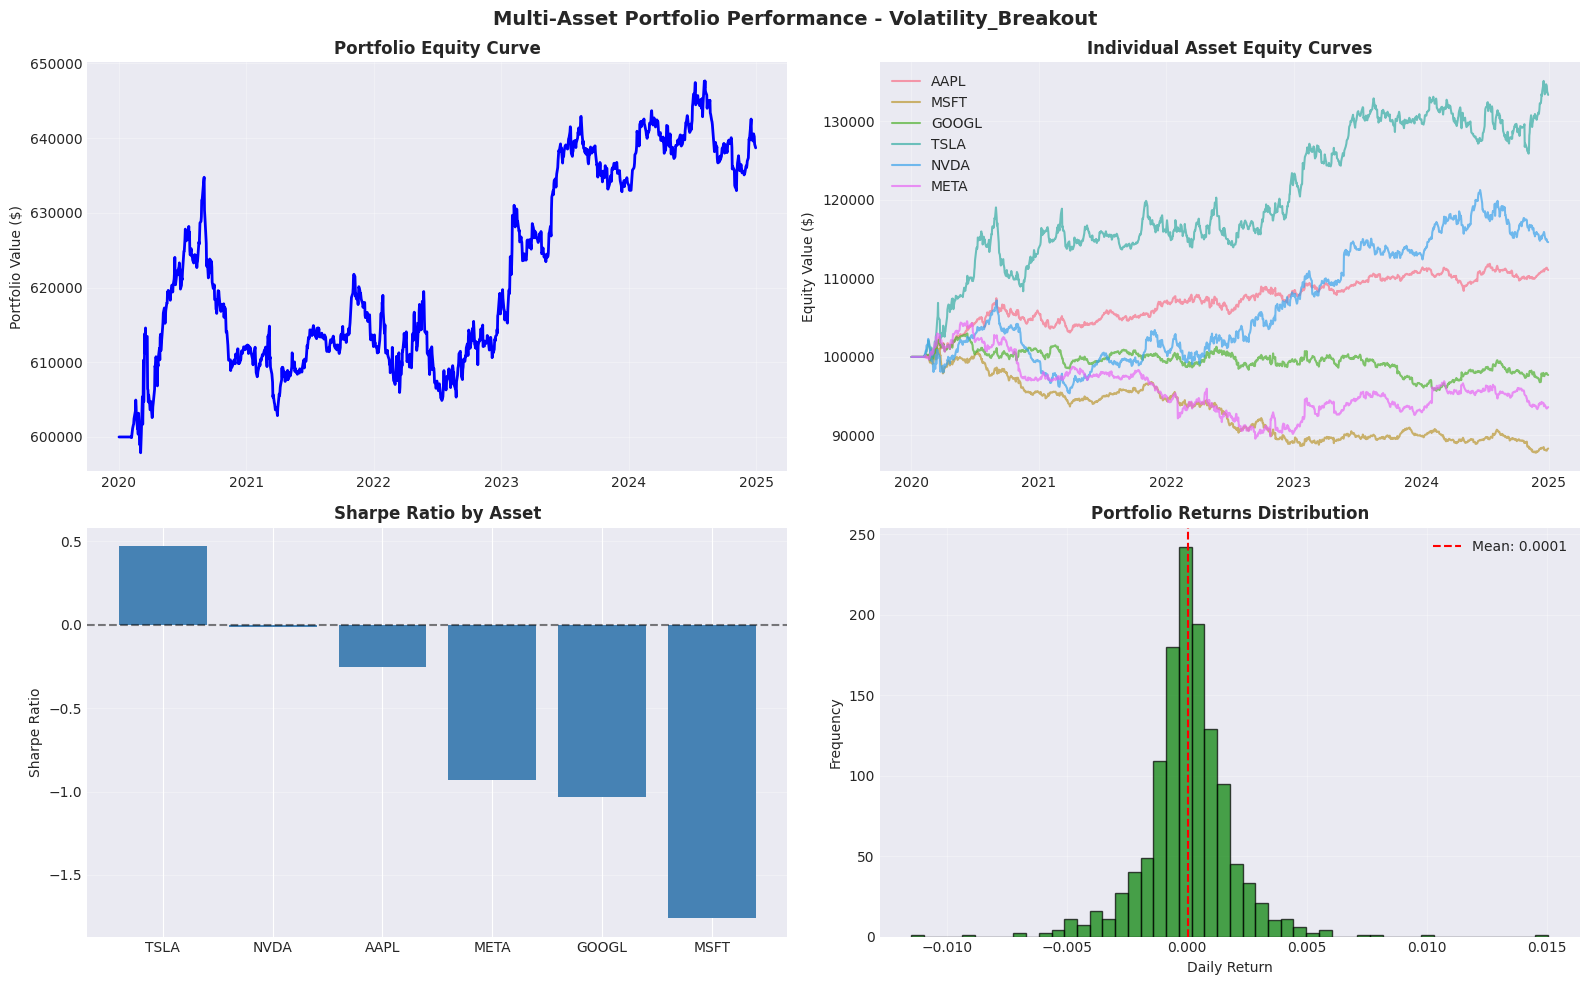

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Portfolio equity curve
axes[0, 0].plot(portfolio_results['portfolio_equity'].index, 
                portfolio_results['portfolio_equity'], 
                linewidth=2, color='blue')
axes[0, 0].set_title('Portfolio Equity Curve', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Portfolio Value ($)')
axes[0, 0].grid(True, alpha=0.3)

# Individual asset equity curves
for ticker, result in portfolio_results['individual_results'].items():
    axes[0, 1].plot(result['equity_curve'].index, 
                    result['equity_curve'], 
                    label=ticker, alpha=0.7, linewidth=1.5)
axes[0, 1].set_title('Individual Asset Equity Curves', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Equity Value ($)')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Asset performance comparison
axes[1, 0].bar(asset_perf_df['Ticker'], asset_perf_df['Sharpe Ratio'], color='steelblue')
axes[1, 0].set_title('Sharpe Ratio by Asset', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Sharpe Ratio')
axes[1, 0].axhline(y=0, color='black', linestyle='--', alpha=0.5)
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Portfolio returns distribution
portfolio_returns = portfolio_results['portfolio_returns'].dropna()
axes[1, 1].hist(portfolio_returns, bins=50, edgecolor='black', alpha=0.7, color='green')
axes[1, 1].axvline(portfolio_returns.mean(), color='red', linestyle='--', 
                   label=f'Mean: {portfolio_returns.mean():.4f}')
axes[1, 1].set_title('Portfolio Returns Distribution', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Daily Return')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.suptitle(f'Multi-Asset Portfolio Performance - {best_strategy}', 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 8. Summary and Key Insights

### System Capabilities Demonstrated:

✅ **Strategy Development**
- 8 different trading strategies across 4 styles
- Continuous forecasts (Carver's approach)
- Multiple timeframes for diversification

✅ **Data Management**
- Automated data downloading from Yahoo Finance
- Data validation and cleaning
- Historical data storage

✅ **Backtesting**
- Realistic transaction costs and slippage
- Proper position sizing with volatility targeting
- Multi-asset portfolio testing

✅ **Risk Management**
- Portfolio optimization (5 methods)
- Drawdown monitoring and controls
- Position size limits
- Volatility targeting

✅ **Execution**
- Mock broker with realistic costs
- Commission and slippage modeling
- Market impact simulation
- Order management

✅ **Performance Monitoring**
- Comprehensive metrics (Sharpe, Calmar, etc.)
- Visual dashboards
- Rolling performance analysis
- Trade statistics

✅ **Compliance**
- Risk limit monitoring
- Automated alerts
- Position scaling on drawdowns

### Next Steps:

1. **Add More Strategies**: Implement carry, seasonal, and fundamental strategies
2. **Forecast Combination**: Combine multiple strategies systematically
3. **Walk-Forward Analysis**: Test strategy robustness over time
4. **Live Trading**: Connect to real broker APIs (Alpaca, Interactive Brokers)
5. **Machine Learning**: Add ML-based signal generation
6. **Alternative Data**: Incorporate sentiment, news, options flow

### Key Takeaways (Carver's Principles):

1. **Diversification is Key**: Multiple strategies, instruments, and timeframes
2. **Cost Awareness**: Transaction costs significantly impact returns
3. **Volatility Targeting**: Consistent risk exposure across instruments
4. **Systematic Approach**: Remove emotion, follow rules
5. **Risk Management First**: Protect capital, manage drawdowns

## Save Results

In [18]:
# Save strategy comparison
comparison_df.to_csv('../data/strategy_comparison.csv', index=False)
print("✓ Strategy comparison saved to data/strategy_comparison.csv")

# Save portfolio results
asset_perf_df.to_csv('../data/portfolio_asset_performance.csv', index=False)
print("✓ Portfolio asset performance saved to data/portfolio_asset_performance.csv")

# Save equity curves
execution_results['equity_curve'].to_csv('../data/execution_equity_curve.csv')
print("✓ Execution equity curve saved to data/execution_equity_curve.csv")

print("\n🎉 Workflow completed successfully!")

✓ Strategy comparison saved to data/strategy_comparison.csv
✓ Portfolio asset performance saved to data/portfolio_asset_performance.csv
✓ Execution equity curve saved to data/execution_equity_curve.csv

🎉 Workflow completed successfully!
